In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.8 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 37.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.15.0 requires dash-core-components==2.0.0, which is not installed.
dash 2.15.0 requires dash-html-components==2.0.0, which is not installed.
dash 2.15.0 requires dash-table==5.0.0, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 44.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [2]:
# Load in the wine dataset
wine = datasets.load_wine()

In [3]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [4]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2)

In [5]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label='target').fit(
    train_data= df_train,
    time_limit=120,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240219_002643"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20240219_002643"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jan 12 09:58:17 UTC 2024
Disk Space Avail:   5.05 GB / 5.36 GB (94.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    142
Train Data Columns: 13
Label Column: tar

In [6]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForestGini_BAG_L1   0.985915       0.154965  1.025286                0.154965           1.025286            1       True          3
1      WeightedEnsemble_L2   0.985915       0.155731  1.475370                0.000766           0.450085            2       True          7
2    ExtraTreesGini_BAG_L1   0.985915       0.160376  0.908317                0.160376           0.908317            1       True          5
3    ExtraTreesEntr_BAG_L1   0.978873       0.134739  0.874862                0.134739           0.874862            1       True          6
4  RandomForestEntr_BAG_L1   0.978873       0.141626  0.930380                0.141626           0.930380            1       True          4
5    KNeighborsDist_BAG_L1   0.732394       0.012951  0.005329                0.012951      

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6690140845070423,
  'KNeighborsDist_BAG_L1': 0.7323943661971831,
  'RandomForestGini_BAG_L1': 0.9859154929577465,
  'RandomForestEntr_BAG_L1': 0.9788732394366197,
  'ExtraTreesGini_BAG_L1': 0.9859154929577465,
  'ExtraTreesEntr_BAG_L1': 0.9788732394366197,
  'WeightedEnsemble_L2': 0.9859154929577465},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'RandomForestGini_BAG_L1': ['RandomForestGini_BAG_L1'],
  'RandomForestEntr_BAG_L1': ['R

In [7]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9722222222222222
Evaluations on test data:
{
    "accuracy": 0.9722222222222222,
    "balanced_accuracy": 0.9777777777777779,
    "mcc": 0.9589742779399312
}


## AutoGluon Regression

In [8]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [9]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [10]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2)

In [12]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
'''
1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
'''
predictor = TabularPredictor(label='target', eval_metric='r2').fit(
    train_data=dfd_train,
    time_limit=120,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240219_003542"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20240219_003542"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jan 12 09:58:17 UTC 2024
Disk Space Avail:   4.93 GB / 5.36 GB (92.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    353
Train Data Columns: 10
Label Column: tar

In [13]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    ExtraTreesMSE_BAG_L1   0.492770       0.126009  0.994062                0.126009           0.994062            1       True          4
1     WeightedEnsemble_L2   0.492770       0.129654  1.296485                0.003644           0.302424            2       True          5
2  RandomForestMSE_BAG_L1   0.446270       0.116076  1.002150                0.116076           1.002150            1       True          3
3   KNeighborsDist_BAG_L1   0.374124       0.012560  0.005908                0.012560           0.005908            1       True          2
4   KNeighborsUnif_BAG_L1   0.373284       0.017310  0.004527                0.017310           0.004527            1       True          1
Number of models trained: 5
Types of models trained:
{'StackerEnsembleModel_RF', 'StackerEnsembleM

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.3732839321479223,
  'KNeighborsDist_BAG_L1': 0.3741244967706867,
  'RandomForestMSE_BAG_L1': 0.4462703890136661,
  'ExtraTreesMSE_BAG_L1': 0.4927700346271454,
  'WeightedEnsemble_L2': 0.4927700346271454},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'RandomForestMSE_BAG_L1': ['RandomForestMSE_BAG_L1'],
  'ExtraTreesMSE_BAG_L1': ['ExtraTreesMSE_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 0.00452733039855957,
  'KNeighborsDist_BAG_L1': 0.00590825080871582,
  'RandomForestMSE_BAG_L1'

In [14]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: r2 on test data: 0.4235985221538233
Evaluations on test data:
{
    "r2": 0.4235985221538233,
    "root_mean_squared_error": -57.5759983013952,
    "mean_squared_error": -3314.995580402263,
    "mean_absolute_error": -47.57127380371094,
    "pearsonr": 0.6556769761548111,
    "median_absolute_error": -44.913330078125
}


<Axes: xlabel='model'>

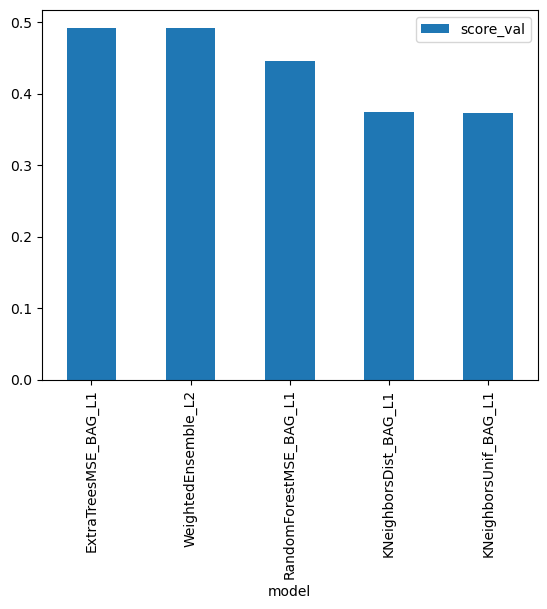

*** SIGTERM received at time=1708304344 on cpu 1 ***
PC: @     0x7fccfa0e0e2e  (unknown)  epoll_wait
    @     0x7fccf9ffd520  (unknown)  (unknown)
[2024-02-19 00:59:04,968 E 665 665] logging.cc:361: *** SIGTERM received at time=1708304344 on cpu 1 ***
[2024-02-19 00:59:04,969 E 665 665] logging.cc:361: PC: @     0x7fccfa0e0e2e  (unknown)  epoll_wait
[2024-02-19 00:59:04,970 E 665 665] logging.cc:361:     @     0x7fccf9ffd520  (unknown)  (unknown)


In [15]:
predictor.leaderboard(silent=True).plot(kind='bar', x='model', y='score_val')